## EAS 503 Homework 1 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw1.ipynb**


### Submission Details
* **Due Date** - September 26, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Testing for Primes (10 Points)
Test if a number is prime using `if-else` conditions. Using the developed code, create a list of first 50 prime numbers. Try designing the shortest possible algorithm and record the time taken for the code to run.

You will need to define a function `primeTester`, which takes no inputs. The function should return a Python `list` of length 50, with first 50 prime numbers. The function should also output (on the screen), the total time taken to generate the 50 prime numbers. Use the `time` library (as shown in class) for capturing the elapsed time.

In [85]:
# Enter your solution here
import time
def primeTester():
    pnos = [2]
    count = 1
    num = 3
    
    while (count < 50):
        flag = 0
        div = 2
        while  (div < num) :
            if num%div == 0:
                flag = 1
                break
            div = div + 1
        if flag == 0:
            pnos.append( num )
            count += 1
        num = num + 1
    print(pnos)
    print(len(pnos))
    print(count)
s = time.time()
primeTester()
e = time.time()
print(e-s)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
50
50
0.00799250602722168


### Problem 2 - Handling Exceptions (10 Points)
In this problem we will read from a text file (**data_p2.txt**) included in the assignment. Please download it and store it in the same directory as this notebook. The code for reading data from the file is given below. You need to store the data and perform a simple mathematical operation on each data point. Each line is _supposed_ to contain a floating point number. But what you will observe is that some lines might have erroneous entries. You need to ignore those lines (Hint: Use exception handling). 

The idea is to write a function, `computeMean()`, which reads in a file and computes the average of the numbers and returns the output. You may use the inbuilt function `sum` when computing the mean.

In [2]:
# Reading from a file. The following code just reads in every line in a text file without doing anything with it.
# You can use the code in your solution.
with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
    for line in f: #iterate over the file line by line
        s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str'

In [86]:
# Enter your solution here

def computeMean():
    with open('data_p2.txt','r') as f:
        total = 0
        count = 0
        for line in f: 
            #print(line)
            s = line.strip()
            try:
                #print("Floating ", s)
                sf = float(line)
                total = total + sf
                count = count + 1
            except ValueError:
                #print("Ignoring value", s)
                pass
    avg = total/count
    print(avg)
            
computeMean()

0.49132205351521485


### Problem 3 - Benchmarking List Performance (10 Points)
We want to check the peformance of the Python inbuilt `del` routine for dropping elements from a list. The question that we want answer for is: does the time required to delete an element from a Python list depend on the size of the list and on the location of the target element.

In each step of the experiment do the following: Create a list of integers from 1 to N. Delete the $i^{th}$ element. Measure the time taken to delete the element (Hint: use the `time` package in Python).

Conduct the above experiment for $N = 1000$ and $i$ ranging from 1 to 1000 in steps of 10. Make sure that you are recreating the Python list every time. Save the times in a list (let us name it `time1000`).

Repeat the above experiment, but set $N = 100000$. This time, vary $i$ from 1 to 100000 in steps of 100. Save the times for this experiment in another list, say, `time100000`.

Plot the two lists using the `matplotlib.pyplot` package. See below for a sample code. You can plot both lists in the same chart to compare.

Using the plots, answer the following (create a markup cell after your code cell(s) and enter your responses):
1. Does the cost of deleting an element depend on the list size?
2. Does the cost of deleting an element depend on the location of the deleted element?



hi


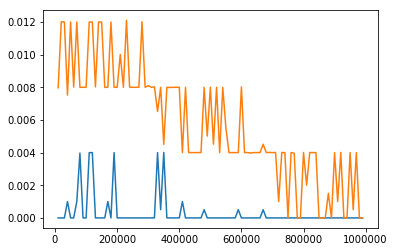

In [87]:
# Using matplotlib for plotting
import matplotlib.pyplot as plt
import time
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
def delOperation():
    x = list(range(1,1000001)) # generate a list
    i = 10000
    indexes = []
    indices =[]
    times1 = []
    times2 = []
    print("hi")
    while i < 1000000:
        s = time.time()
        del x[i]
        e = time.time()
        time10000 = e-s
        times1.append(time10000)
        indexes.append(i)
        x = list(range(1,1000001))
        i += 10000
    
    y = list(range(1,10000001))
    j = 100000
    while j < 10000000:
        s = time.time()
        del y[j]
        e = time.time()
        time100000 = e-s
        times2.append(time100000)
        #indices.append(j)
        y = list(range(1,10000001))
        j += 100000
    
    #y = [x1**2+2*x1 for x1 in x] # create a new list using the original list. Note the Pythonic inline creation of lists.
    #y1 = [x1**2.3 for x1 in x]
    plt.plot(indexes,times1)
    plt.plot(indexes,times2)

delOperation()

# 1) No it is not. We are recreating the list each time, but the time is decreasing eventhen.
# 2) Yes it depends on the location of the item


### Problem 4 - The Monty Hall Problem (20 Points)
The Monty Hall problem is an interesting and often counter-intuitive game.

> Consider that you are a contestant on a game show. There are 3 closed doors. Behind one door is the car (the prize), and behind the other two doors are goats (not the prize). First you are asked to pick one door (call it door A). Without opening door A, the eponymous host of the game, Monty Hall, examines the other two doors. Monty always opens the door with a goat (call it B). If both doors had goats behind them, he picks one at random.

> The game is this: _stick_ or _switch_; after finding out about the door B (and the fact that there is a goat behind it), do you stick with your original choice of door A or switch to the other unopened door, C? Statistically speaking, once you know about B, will the probability of the car to be behind C is greater than, less than, or equal to that of behind A?

> Surprisingly, the odds aren't 50-50. If you switch doors you'll win 2/3 of the time!

**Monty hall problem**: Implement a simulation for the Monty Hall game. Run the simulation 1000 times to figure out the empirical (observed) probability of winning when switching and winning when sticking to the original choice. Each simulation operates as follows:
1. First randomly pick a door configuration (In an actual game, this configuration will be visible to Monty but not to the contestant). You will have to first figure out the total number of possible configurations. For example, one possibility could be GGC, which means first and second doors have goats and third door has the car. You can select one of the configuration randomly in many ways. For instance, you could use the routine `np.random.randint(0,N)` to randomly obtain an integer between 0 and $N$, where $N$ is the total number of configurations. Another option would be pick a random number between 0 and 2 and use that to assign the car to a particular door.
2. Next, the contestant randomly picks one of the three doors as the one with the car behind it. This can also be done using the `np.random.randint()` method.
3. Next, the host (the program - Monty) deterministically chooses which of the other two doors to open. If the contestant has chosen a door with the car, then the program can just choose the first of the two remaining doors (since both have goats behind them). Or it could be a random coin flip (again, use `np.random.randint()` method). 
4. Finally, the contestant randomly chooses to either stick or switch. The program checks if the contestant won (the chosen door does have a car behind it) or not (the chosen door has a goat behind it). In case of winning, record if the winning was because of _sticking_ or _switching_.

Once the method `simulategame()` that does the above four steps and returns _sticking_, _switching_, or None, depending on the win/loss scenario, run the method 1000 times and count the number of times the win was due to _sticking_ to the decision in Step 1, and number of times the win was due to _switching_ to the other door.

In [92]:
# Enter your solution here
import numpy as np
import random 
def simultgame():
    m =[]
    d = [1, 2, 3]
    con = random.choice(d)
    car = random.choice(d)
    win = 0 
    loss = 0
    win_if_switch = 0
    win_if_stick = 0
    for j in range(1,1001):
        if (con == car):
            for i in d:
                if i != car:
                    m.append(i)
                    #print(m)
            mon = random.choice(m)
                    #print(mon)
        else:
            for i in d:
                if i != con and i != car:
                    mon = i
                    break
                    m.append(i)
                    #print(m)
                    mon = random.choice(m)
                    #print(mon)
                
    #####Stick or Switch####
        
        re_pick = ['switch','stick']
        re_pick = random.choice(re_pick)
        if re_pick == 'switch':
            if con == car:
                loss = loss + 1
                
            else: 
                win = win + 1
                win_if_switch += 1
        
        else:
            if con == car:
                win = win + 1
                win_if_stick += 1
            else:
                loss = loss + 1
                

    #print(j)
    #print(win)
    print(win_if_switch)
    print(win_if_stick)
    print(loss)
    
    win_percent = (win/1000) * 100
    print(win_percent)
    
    loss_percent = (loss/1000) * 100
    print(loss_percent)
    
    
    
    
    
simultgame()

505
0
495
50.5
49.5
